# Deeplab

In [1]:
%matplotlib inline
# %load_ext autoreload
# %autoreload 2
from learn import *

In [2]:
num_gpus = 2
gpu_start = 0
num_workers = 8
# device_ids = range(gpu_start, gpu_start + num_gpus)
device_ids = [0,1,6,7]
torch.cuda.set_device(gpu_start)
bs = 9 * num_gpus * 2

In [3]:
data = None

In [4]:
learn, denorm, data = learner_on_dataset(datapaths[2], bs, device_ids, num_workers, model_name='deeplab',
                                         debug=False, global_dataset=True, data=data, num_slice=9, sz=256)
(trn_x,trn_y), (val_x,val_y) = data


Data finished loading: data/train/AOI_4_Shanghai_Train


In [5]:
learn.load('deeplab-shanghai')
learn.unfreeze()

epoch      trn_loss   val_loss   mask_acc                     
    0      0.144049   0.21212    0.119919  
    1      0.13901    0.331843   0.119898                    
 51%|█████     | 406/802 [13:38<13:18,  2.02s/it, loss=0.139]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    3      0.138539   0.22878    0.119919                    
    4      0.139929   0.240302   0.119912                    
 68%|██████▊   | 543/802 [18:53<09:00,  2.09s/it, loss=0.138]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 99%|█████████▉| 794/802 [28:36<00:17,  2.16s/it, loss=0.142]    7      0.142075   0.28342    0.119919  
    8      0.140025   0.316211   0.119919                    
 87%|████████▋ | 694/802 [23:34<03:40,  2.04s/it, loss=0.14] 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    11     0.143972   0.216925   0.119918                    
    12     0.138783   0.224663   0.119919                    
 79%|███████▉  | 635/802 [23:12<06:06,  2.19s/it, loss=0.139]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    15     0.139673   0.236329   0.119919                    
    16     0.143449   0.231894   0.119919                    
 66%|██████▋   | 533/802 [18:30<09:20,  2.08s/it, loss=0.141]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    17     0.140862   0.334988   0.119896                    
    18     0.140923   0.231095   0.119915                    
    19     0.136733   0.231541   0.119919                    
    20     0.144158   0.250307   0.119919                    
 94%|█████████▍| 756/802 [25:46<01:34,  2.05s/it, loss=0.14]     21     0.139443   0.259224   0.119919  
    22     0.141356   0.268033   0.119919                    
    23     0.137235   0.275971   0.119916                    
    24     0.142414   0.251183   0.119919                    
    25     0.139547   0.235495   0.119919                    
    26     0.138412   0.266472   0.119919                    
    27     0.138829   0.255708   0.119919                    
    28     0.135045   0.249623   0.119919                    
    29     0.137631   0.254889   0.119919                    

CPU times: user 2d 21h 40min 30s, sys: 2d 3h 44min 37s, total: 5d 1h 25min 7s
Wall time: 15h 44min 49s


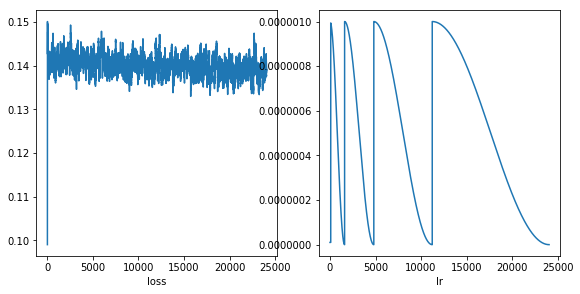

In [6]:
%%time
lr = 1e-5 / 10
lrs = np.array([lr/9, lr])
wd = 0.01
wds = [wd/9, wd]
learn.unfreeze()
train_and_plot(learn, 0, 'deeplab-shanghai', lrs=lrs, n_cycles=4, wds=wds, use_wd_sched=True,
               cycle_len=2, cycle_mult=2, best_save_name='deeplab-shanghai')

In [ ]:
#learn.save('deeplab-shanghai-wds2')

In [ ]:
# learn.lr_find()
# learn.sched.plot()